In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import pandas as pd
import pickle
import ROOT
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from UT_Helper import *

In [2]:
with open('/etude/sowrol/UT_map.pkl', 'rb') as handle:
    UT_map = pickle.load(handle)

In [3]:
i = 0
ps_paths = []
for root, dirs, files in os.walk("/etude/sowrol/UT_data"):
    for name in files:
        if "pulseShape.root" in name:
            i += 1
            path = root + "/" + name
            ps_paths.append(path)
            print(path)
print(i)

/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip3/Pulseshape_400V_5C/1d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip3/Pulseshape_400V_5C/0d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip3/Pulseshape_400V_5C/2d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip3/Pulseshape_400V_5C/3d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip1/Pulseshape_400V_5C/1d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip1/Pulseshape_400V_5C/0d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip1/Pulseshape_400V_5C/2d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip1/Pulseshape_400V_5C/3d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip2/Pulseshape_400V_5C/1d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip2/Pulseshape_400V_5C/0d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M2/2022/8/8/Chip2/Pulseshape_400V_5C/2d4/pulseShape.root
/etude/sowrol/UT_data/UTbX_7CT_M

### 3 types of PS measurements

In [4]:
ps_dirs = np.array([path.split("/")[-3] for path in ps_paths])
pd.Series(ps_dirs).value_counts()

Pulseshape_400V_5C               64
Pulseshape_200V_-15C_afterPed    32
Pulseshape_200V_m20C             16
Chip0                             1
dtype: int64

### Drop the 1 empty file

In [5]:
empty_index = np.argwhere(ps_dirs == "Chip0")[0,0]
del ps_paths[empty_index]
ps_paths
ps_dirs = np.array([path.split("/")[-3] for path in ps_paths])
pd.Series(ps_dirs).value_counts()

Pulseshape_400V_5C               64
Pulseshape_200V_-15C_afterPed    32
Pulseshape_200V_m20C             16
dtype: int64

In [6]:
type1_paths = []
type2_paths = []
type3_paths = []
for i in range(len(ps_paths)):
    if ps_dirs[i] == "Pulseshape_400V_5C":
        type1_paths.append(ps_paths[i])
    if ps_dirs[i] == "Pulseshape_200V_-15C_afterPed":
        type2_paths.append(ps_paths[i])
    if ps_dirs[i] == "Pulseshape_200V_m20C":
        type3_paths.append(ps_paths[i])

### 400V_5C

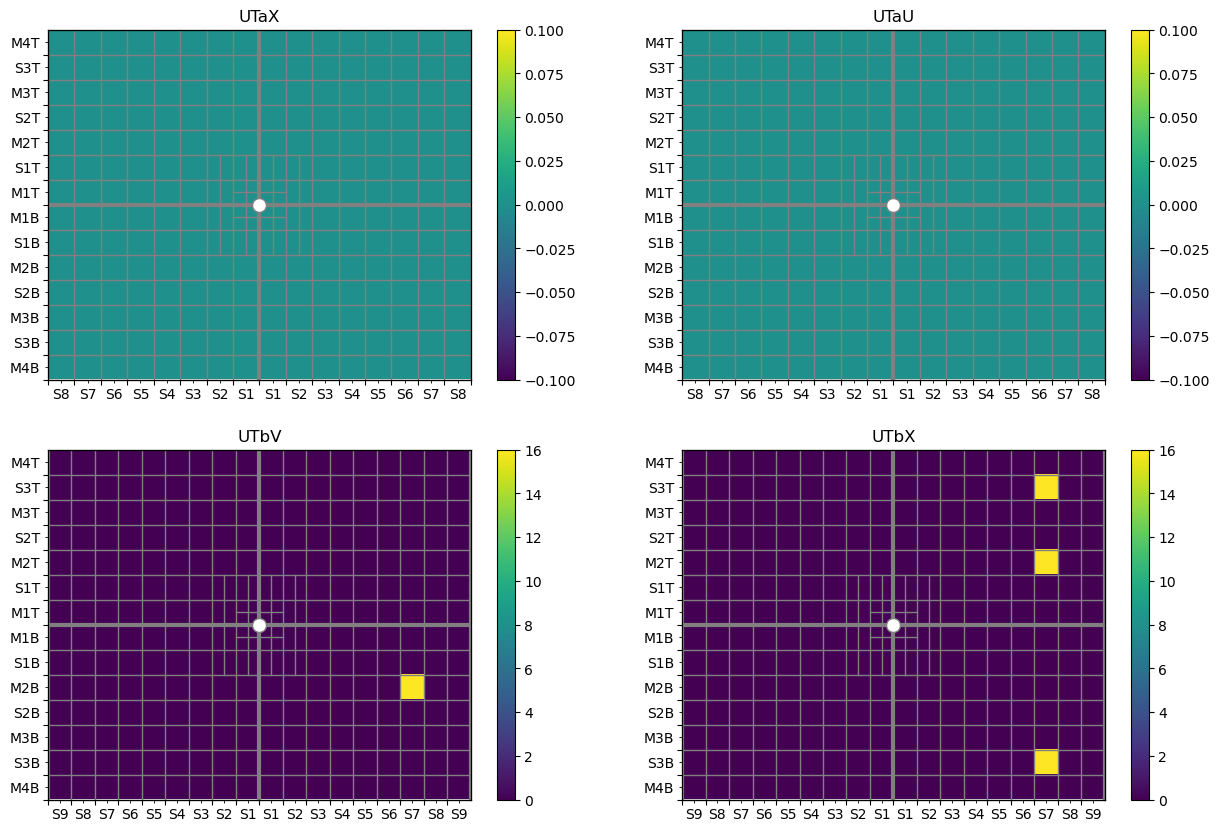

In [91]:
UTaX, UTaU, UTbV, UTbX = map_UT_counts(type1_paths, UT_map)

fig, ax = plt.subplots(2,2,figsize=(15,10))
draw_UT(UTaX, "UTaX", fig, ax[0][0]);
draw_UT(UTaU, "UTaU", fig, ax[0][1]);
draw_UT(UTbV, "UTbV", fig, ax[1][0]);
draw_UT(UTbX, "UTbX", fig, ax[1][1]);
fig.savefig(
    "2a.pdf",
    bbox_inches=transforms.Bbox([[0.52, 0.08], [0.92, 0.5]]).transformed(
        fig.transFigure - fig.dpi_scale_trans
    ),
)

In [8]:
type1_hdict = create_hdict(type1_paths)
#type1_dict

In [9]:
type1_hdict[type1_paths[0]]

{'hist_tab': [<cppyy.gbl.TH1F object at 0x55e1af2307a0>,
 'mean_hist': <cppyy.gbl.TH1F object at 0x55e1aeb3b480>}

### total mean hist

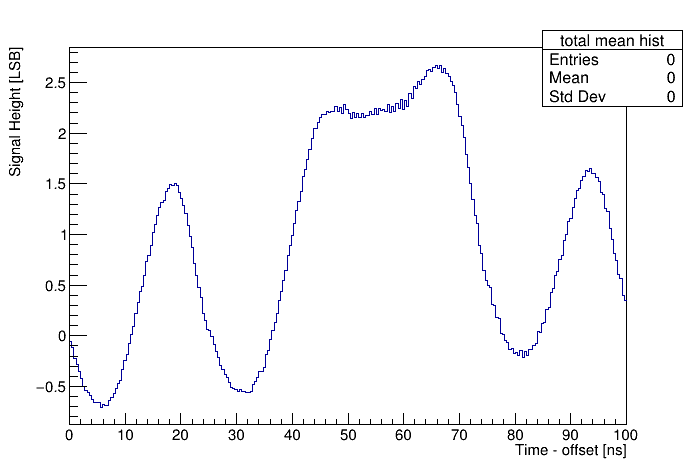

In [10]:
can = ROOT.TCanvas()
# i = 10
# type1_hdict[type1_paths[i]]["mean_hist"].Draw()
type1_hdict["total_mean_hist"].Draw()
can.Draw()

### all mean hists in a loop

In [11]:
# can_tab = []
# i = 0
# for filename in type1_paths:
#     can_tab.append(ROOT.TCanvas())
#     type1_hdict[filename]["mean_hist"].Draw()
#     can_tab[i].Draw()
#     i += 1

### all hists for a given filepath

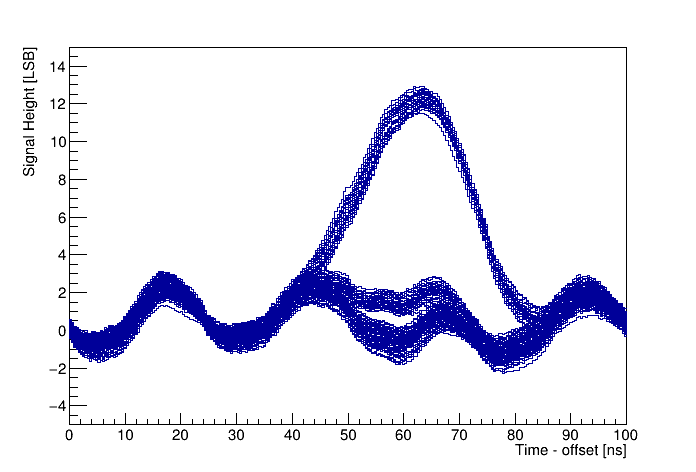

In [12]:
can = ROOT.TCanvas()
hist_tab = type1_hdict[type1_paths[0]]["hist_tab"]
for hist in hist_tab:
    hist.Draw("same")
hist_tab[0].SetMaximum(15)
hist_tab[0].SetMinimum(-5)
ROOT.gStyle.SetOptStat(0)
can.Draw()

# SELEKCJA danych HQ

# maxbinvalue > 8
# w maksimum ustalimy nowe 0 skali czasu
#
# Amp(-25) i Amp(25) / Amp(0) < 4% - sprawdzić czy tak jest
# Użyć MLP do odtworzenia impulsu

#doktorat Maćka Majewskiego



In [13]:
type1_HQ_data = HQ_DATA(type1_paths, type1_hdict, "type1")

Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).
Warning in <TROOT::Append>: Repl

### Interesujące!

In [14]:
np.min(type1_HQ_data.max_loc_tab) + np.max(type1_HQ_data.max_loc_tab)

100.0

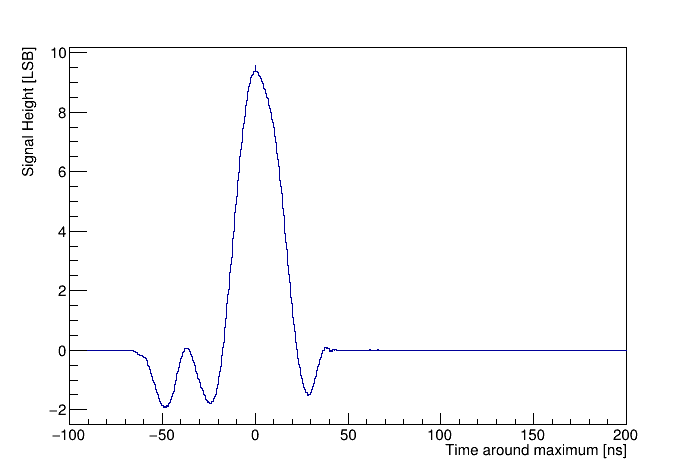

In [15]:
can = ROOT.TCanvas()
can.Draw()
type1_HQ_data.HQ_hist.Draw()

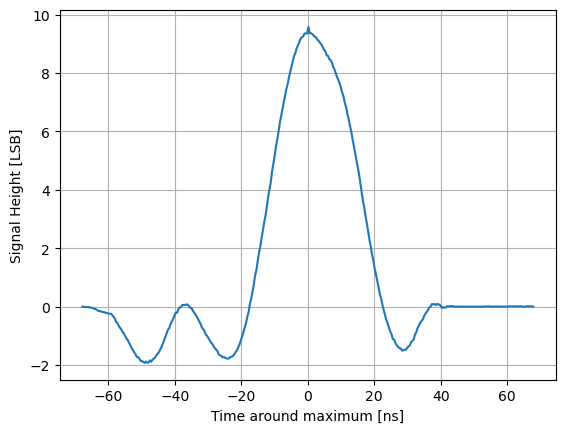

In [16]:
fig, ax = plt.subplots()
ax.plot(type1_HQ_data.x_train, type1_HQ_data.y_train)
ax.set_xlabel("Time around maximum [ns]")
ax.set_ylabel("Signal Height [LSB]")
ax.grid()

In [59]:
def shaper(t, n, tau, C):
    return C*(t+50)**n*np.exp(-(t+50)/tau)*np.heaviside(t+50, 0.5)

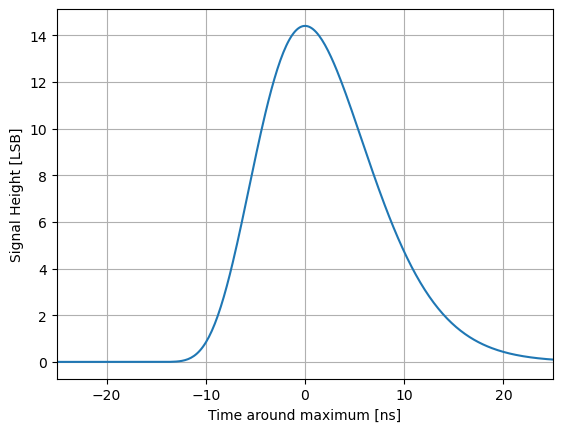

In [74]:
t = np.linspace(-100, 50, 1000)
U = shaper(t, 8, 2, 0.00001)
plt.plot(t+50-8*2,U)
plt.xlim([-25,25])
plt.xlabel("Time around maximum [ns]")
plt.ylabel("Signal Height [LSB]")
plt.grid()

In [64]:
sigma_hist = ROOT.TH1F("sigma hist", "sigma hist", 768, -100, 200)
x_trim_tab = [type1_HQ_data.x_train[i] for i in range(len(type1_HQ_data.x_train)) if abs(type1_HQ_data.x_train[i]) < 20]
y_trim_tab = [type1_HQ_data.y_train[i] for i in range(len(type1_HQ_data.y_train)) if abs(type1_HQ_data.x_train[i]) < 20]
    
y_min = np.min(y_trim_tab)    
    
for x, y in zip(x_trim_tab, y_trim_tab):
        i = sigma_hist.FindBin(x)
        sigma_hist.SetBinContent(i, y-y_min)

width = sigma_hist.GetStdDev()
print(width)

8.82900296994327


Warning in <TROOT::Append>: Replacing existing TH1: sigma hist (Potential memory leak).


In [68]:
sigma_hist.GetMinimum()

0.0

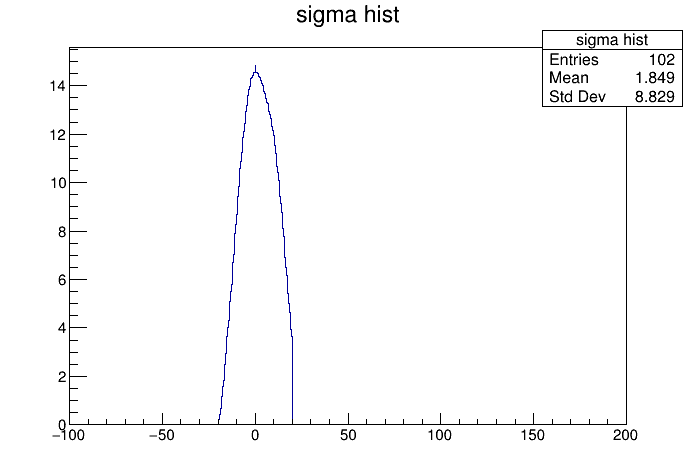

In [63]:
can = ROOT.TCanvas()
sigma_hist.Draw()
ROOT.gStyle.SetOptStat(1)
can.Draw()


In [54]:
sigma_hist.GetRMS()

4.970834535365267

In [55]:
sigma_hist.GetRMS()

4.970834535365267

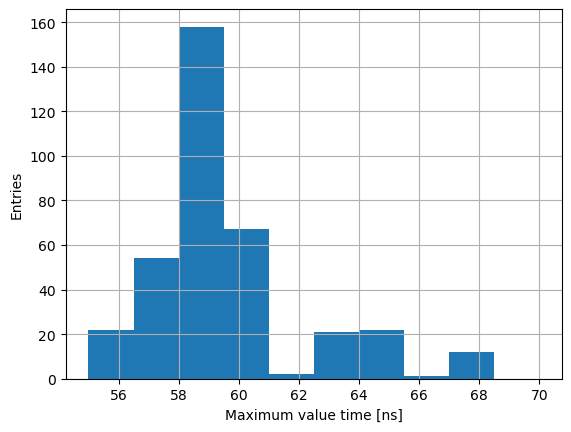

In [23]:
fig, ax = plt.subplots()
ax.hist(type1_HQ_data.max_loc_tab, range=(55,70), bins = 10)
ax.set_xlabel("Maximum value time [ns]")
ax.set_ylabel("Entries")
ax.grid()

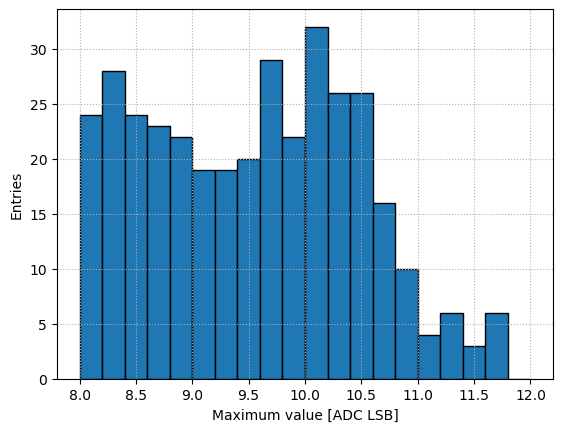

In [97]:
fig, ax = plt.subplots()
ax.grid(ls = ':')
ax.hist(type1_HQ_data.max_tab, range = (8,12), bins = 20, ec='k')
ax.set_xlabel("Maximum value [ADC LSB]")
ax.set_ylabel("Entries")
fig.savefig("2b.pdf")


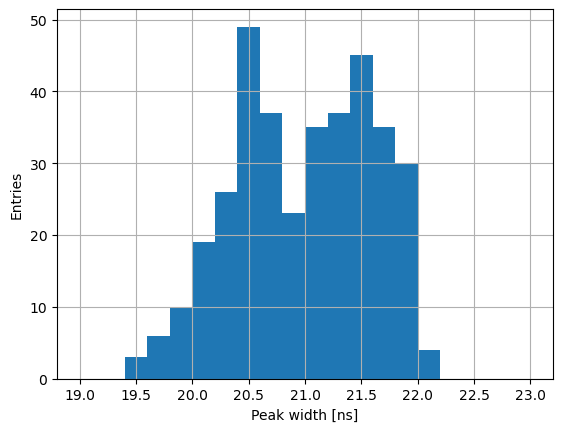

In [24]:
fig, ax = plt.subplots()
ax.hist(np.array(type1_HQ_data.width_tab), range = (19,23), bins = 20)
ax.set_xlabel("Peak width [ns]")
ax.set_ylabel("Entries")
ax.grid()

In [21]:
fname = "400V_5C.txt"
data = np.transpose(np.vstack((type1_HQ_data.x_train, type1_HQ_data.y_train)))
np.savetxt(fname, data, fmt = '%.6f')

### 200V_-15C_afterPed

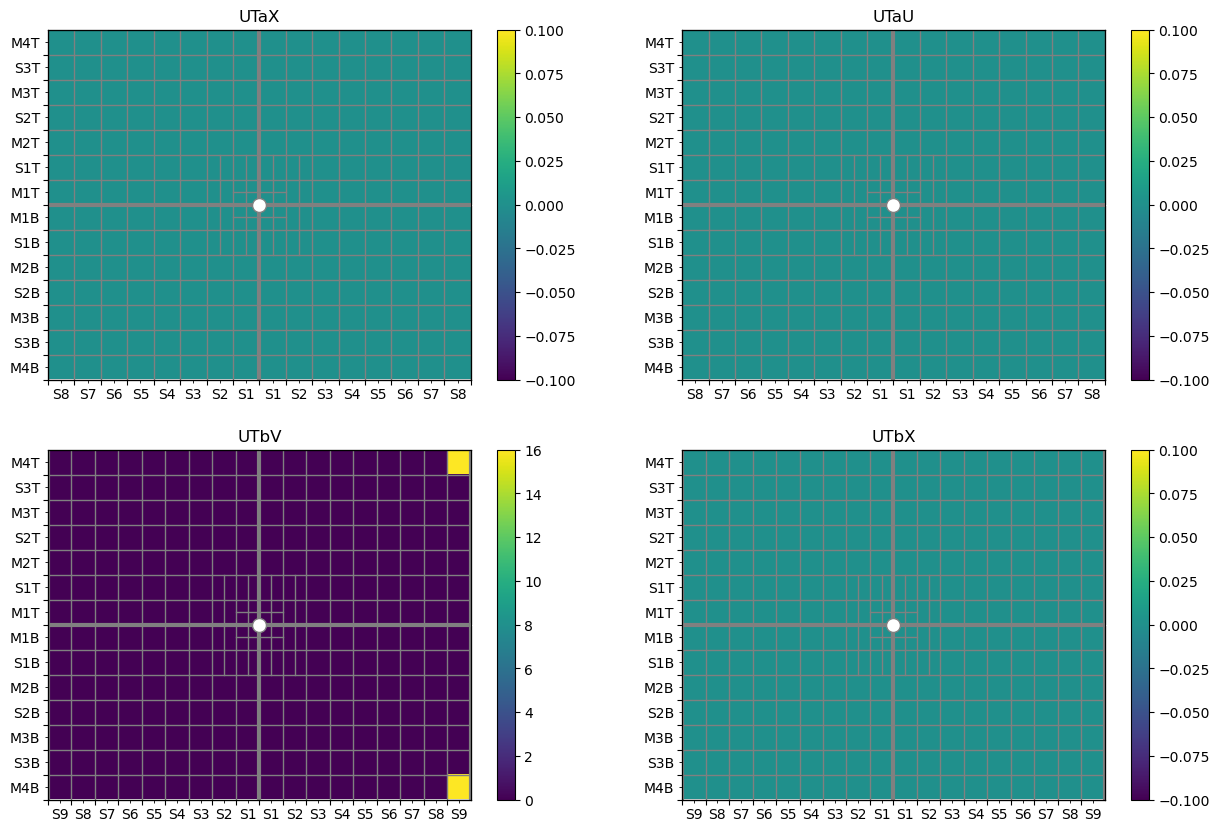

In [22]:
UTaX, UTaU, UTbV, UTbX = map_UT_counts(type2_paths, UT_map)

fig, ax = plt.subplots(2,2,figsize=(15,10))
draw_UT(UTaX, "UTaX", fig, ax[0][0]);
draw_UT(UTaU, "UTaU", fig, ax[0][1]);
draw_UT(UTbV, "UTbV", fig, ax[1][0]);
draw_UT(UTbX, "UTbX", fig, ax[1][1]);

In [23]:
type2_hdict = create_hdict(type2_paths)
#type1_dict

### total mean hist

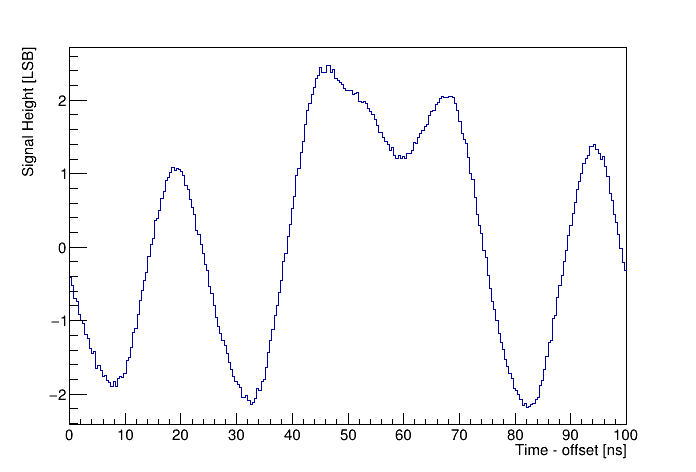

In [24]:
can = ROOT.TCanvas()
# i = 10
# type1_hdict[type1_paths[i]]["mean_hist"].Draw()
type2_hdict["total_mean_hist"].Draw()
can.Draw()

### all mean hists in a loop

In [25]:
# can_tab = []
# i = 0
# for filename in type2_paths:
#     can_tab.append(ROOT.TCanvas())
#     type2_hdict[filename]["mean_hist"].Draw()
#     can_tab[i].Draw()
#     i += 1

### all hists for a given filepath

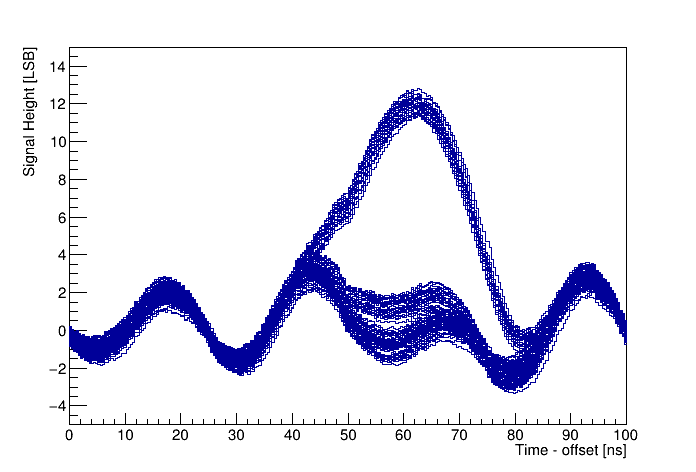

In [26]:
can = ROOT.TCanvas()
hist_tab = type2_hdict[type2_paths[0]]["hist_tab"]
for hist in hist_tab:
    hist.Draw("same")
hist_tab[0].SetMaximum(15)
hist_tab[0].SetMinimum(-5)
ROOT.gStyle.SetOptStat(0)
can.Draw()

In [27]:
type2_HQ_data = HQ_DATA(type2_paths, type2_hdict, "type2")

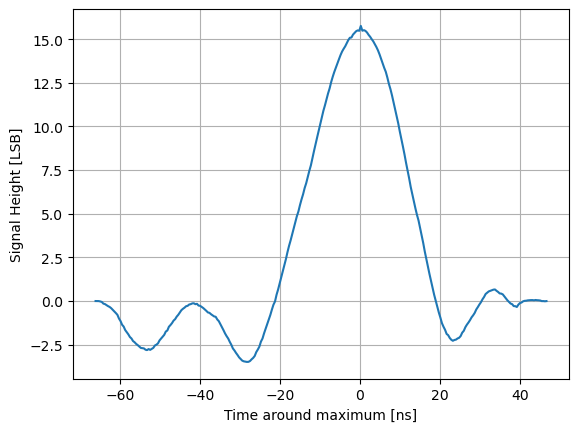

In [28]:
fig, ax = plt.subplots()
ax.plot(type2_HQ_data.x_train, type2_HQ_data.y_train)
ax.set_xlabel("Time around maximum [ns]")
ax.set_ylabel("Signal Height [LSB]")
ax.grid()

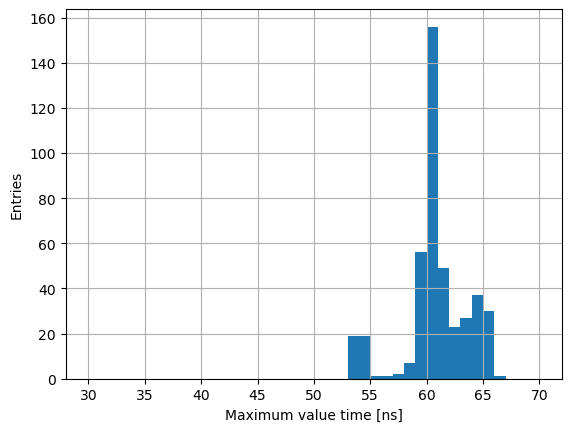

In [32]:
fig, ax = plt.subplots()
ax.hist(type2_HQ_data.max_loc_tab, range=(30,70), bins = 40)
ax.set_xlabel("Maximum value time [ns]")
ax.set_ylabel("Entries")
ax.grid()

In [33]:
np.min(type2_HQ_data.max_loc_tab) + np.max(type2_HQ_data.max_loc_tab)

119.53125

In [34]:
fname = "200V_-15C.txt"
data = np.transpose(np.vstack((type2_HQ_data.x_train, type2_HQ_data.y_train)))
np.savetxt(fname, data, fmt = '%.6f')

### 200V_m20C

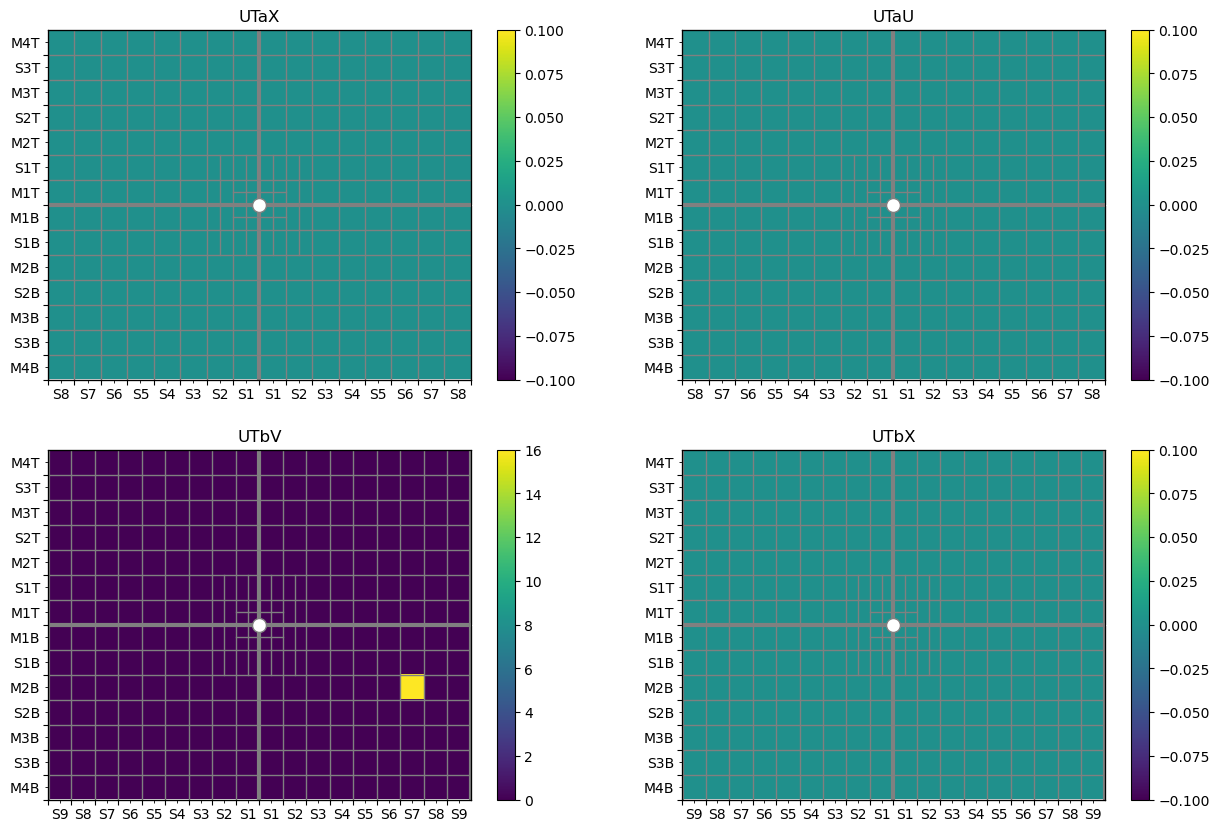

In [35]:
UTaX, UTaU, UTbV, UTbX = map_UT_counts(type3_paths, UT_map)

fig, ax = plt.subplots(2,2,figsize=(15,10))
draw_UT(UTaX, "UTaX", fig, ax[0][0]);
draw_UT(UTaU, "UTaU", fig, ax[0][1]);
draw_UT(UTbV, "UTbV", fig, ax[1][0]);
draw_UT(UTbX, "UTbX", fig, ax[1][1]);

In [36]:
type3_hdict = create_hdict(type3_paths)
#type1_dict

### total mean hist

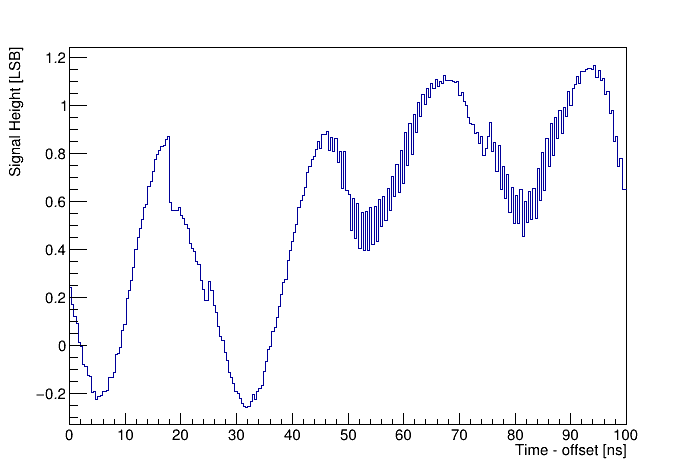

In [37]:
can = ROOT.TCanvas()
# i = 10
# type1_hdict[type1_paths[i]]["mean_hist"].Draw()
type3_hdict["total_mean_hist"].Draw()
can.Draw()

### all mean hists in a loop

In [38]:
# can_tab = []
# i = 0
# for filename in type3_paths:
#     can_tab.append(ROOT.TCanvas())
#     type3_hdict[filename]["mean_hist"].Draw()
#     can_tab[i].Draw()
#     i += 1

### all hists for a given filepath

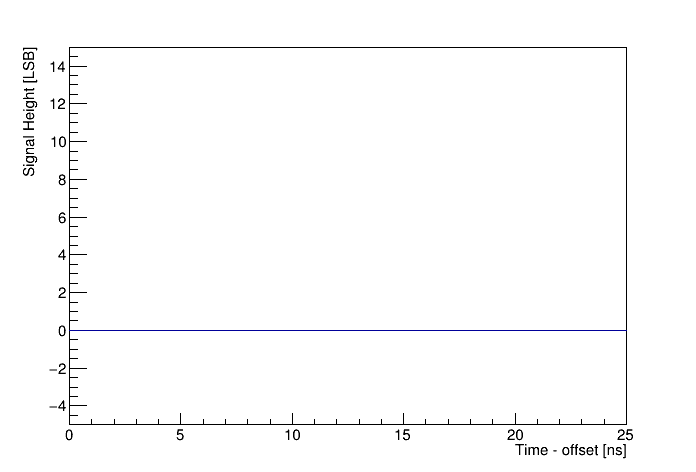

In [39]:
can = ROOT.TCanvas()
hist_tab = type3_hdict[type3_paths[15]]["hist_tab"]
for hist in hist_tab:
    hist.Draw("same")
hist_tab[0].SetMaximum(15)
hist_tab[0].SetMinimum(-5)
ROOT.gStyle.SetOptStat(0)
can.Draw()

### Nie ma danych HQ

In [40]:
type3_HQ_data = HQ_DATA(type3_paths, type3_hdict, "type3")

ZeroDivisionError: division by zero